In [261]:
import pandas as pd
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


In [262]:
df=pd.read_csv("forestfires (1).csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [263]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["size_category"]=le.fit_transform(df["size_category"])

In [264]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [265]:
x=df.iloc[:,2:10]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [266]:
y=df.iloc[:,-1]

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [268]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=8,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [269]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [270]:
# Fit the model
h = model.fit(X_train, Y_train, validation_split=0.2, epochs=70, batch_size=32)

# evaluate the model on train data
scores = model.evaluate(X_train, Y_train)
print(model.metrics_names[1], scores[1]*100)

Epoch 1/70
11/11 [==============================] - 1s 21ms/step - loss: 68.7951 - accuracy: 0.2636 - val_loss: 49.6503 - val_accuracy: 0.2651
Epoch 2/70
11/11 [==============================] - 0s 6ms/step - loss: 33.2120 - accuracy: 0.2636 - val_loss: 13.7812 - val_accuracy: 0.2651
Epoch 3/70
11/11 [==============================] - 0s 5ms/step - loss: 5.7086 - accuracy: 0.5121 - val_loss: 5.7261 - val_accuracy: 0.6747
Epoch 4/70
11/11 [==============================] - 0s 7ms/step - loss: 5.9445 - accuracy: 0.6697 - val_loss: 5.8916 - val_accuracy: 0.6627
Epoch 5/70
11/11 [==============================] - 0s 5ms/step - loss: 4.5183 - accuracy: 0.6697 - val_loss: 2.8383 - val_accuracy: 0.6747
Epoch 6/70
11/11 [==============================] - 0s 5ms/step - loss: 2.4741 - accuracy: 0.5606 - val_loss: 2.5771 - val_accuracy: 0.4699
Epoch 7/70
11/11 [==============================] - 0s 6ms/step - loss: 1.9997 - accuracy: 0.5455 - val_loss: 1.8802 - val_accuracy: 0.6747
Epoch 8/70
11/1

In [271]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

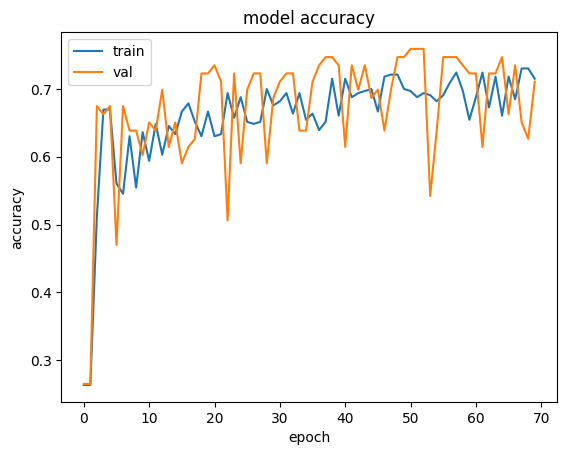

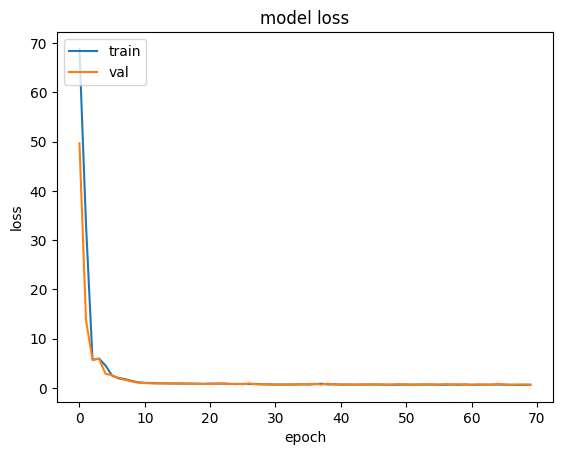

In [272]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [273]:
# evaluate the model on test data
scores =model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 5ms/step - loss: 0.6739 - accuracy: 0.6346
accuracy: 63.46%
